### Часть 1: EDA и исследовательский анализ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Загружаем датасет Спотифай
df = pd.read_csv('dataset.csv')  # Путь к вашему файлу

# Первичная разведка
#Здесь я применяю несколько функций для первичной разведки: определяю размер датасета, то, сколько в нём столбцов, строк и какие они.
#Также пример того, как выглядят данные, также проверил наличие того, есть ли пропуски и сколько их для понимания полноты датасета
print(f"Размер датасета: {df.shape}")
print(f"Столбцы:\n{df.columns.tolist()}")
print(f"\nПример данных:\n{df.head()}")
print(f"\nНаличие пропусков:\n{df.isnull().sum()}")

# ## Анализ целевой переменной
# ## Перед анализом взаимосвязей между переменными изучим то, как распределена таргетная переменная popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Распределение популярности треков')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.show()

# %% [markdown]
# Вывод: Распределение имеет пики около значений 20-30 и 40-50. Распределение охватывает весь диапазон 
# Большинство треков имеют популярность равную 0
# %%

# Анализ числовых признаков
# Изучим распределения ключевых аудио-характеристик

audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(audio_features):
    sns.histplot(df[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Распределение {feature}')
plt.tight_layout()
plt.show()

# Вывод: 
# Большинство признаков имеют специфические распределения (например, instrumentalness, speechiness, acousticness похожи на экспоненциальные)
# Danceability имеет распределение схожее с нормальным
# Loudness имеет нормальное распределение

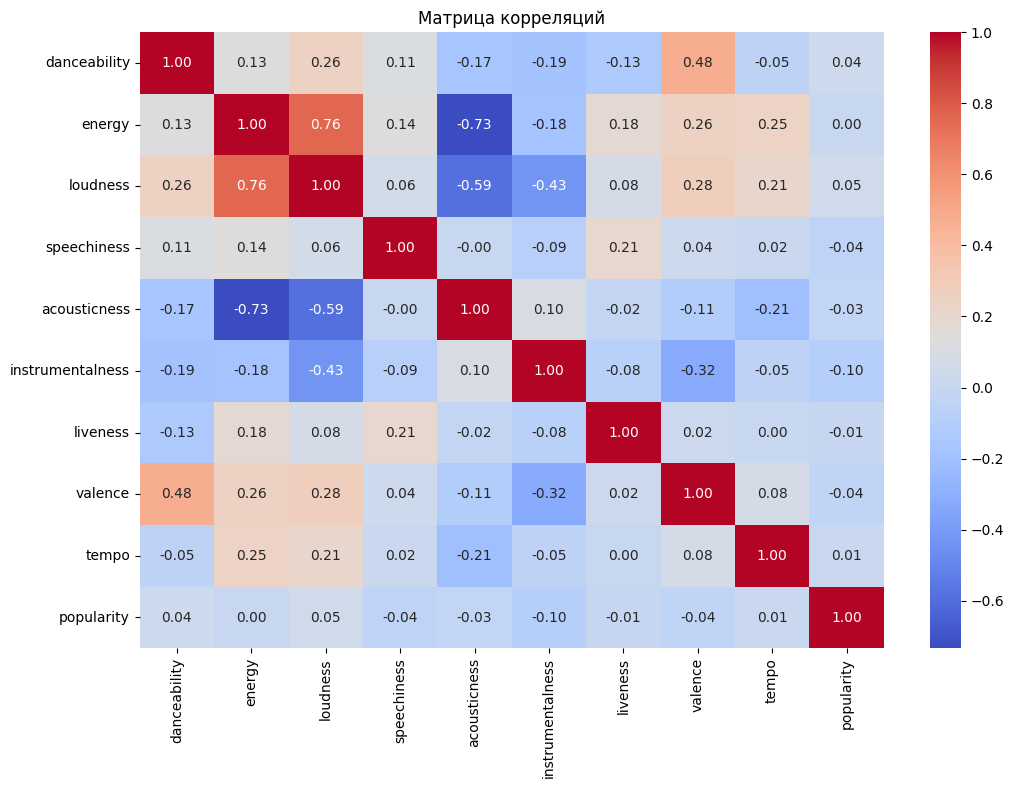

In [29]:
# Матрица корреляций
plt.figure(figsize=(12, 8))
corr_matrix = df[features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

# Точечные графики для наиболее коррелирующих признаков
#sns.pairplot(df[['popularity', 'danceability', 'energy', 'loudness']])
#plt.show()

#Составим матрицу корреляций в виде "тепловой карты" и попытаемся сделать выводы о коррелирующих признаках

In [28]:
#Вывод:
#Заметна яркая корреляция признаков loudness и Energy (Можно говорить о том, что чем громче музыка, тем она энергичнее)
#Видна обратная корреляция признаков Acousticness и Energy (Более акустичная музыка будет менее энергичной и наоборот)
#Видна срдняя корреляция между признаками Valence и Danceability (Более позитивная музыка чаще будет более танцевальной)
#Слабые корреляции для признаков Loudness - Valence и Loudness - Tempo (Чем громче, тем позитивнее и чем громче, тем более быстрый темп будет в музыке)

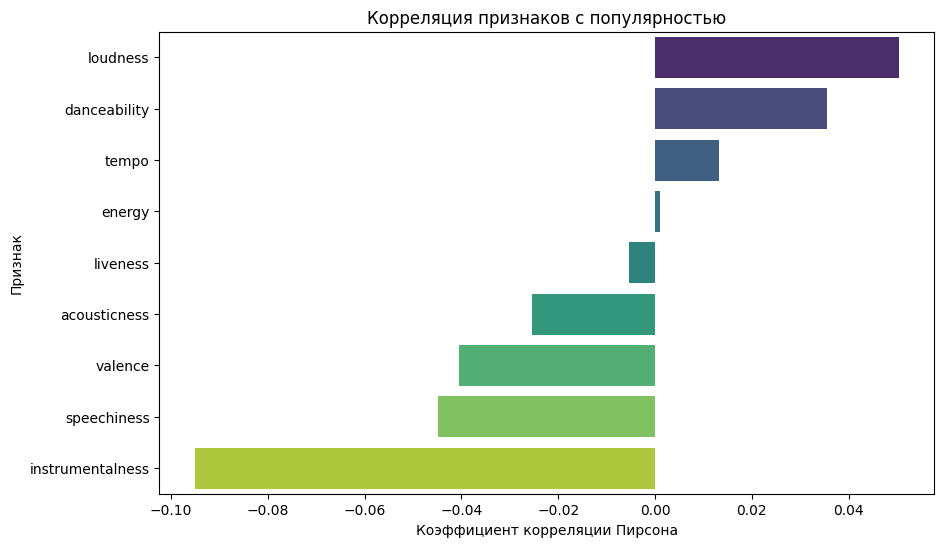

In [34]:
#Анализ корреляций с таргетной переменной
#Вычисление корреляций
corr_with_target = df[audio_features + ['popularity']].corr()['popularity'].sort_values(ascending=False)[1:]

# Визуализация анализа
plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr_with_target.values, 
    y=corr_with_target.index, 
    hue=corr_with_target.index,  # Явно указываем hue
    palette='viridis',
    legend=False  # Отключаем легенду чтобы не дублировать подписи
)
plt.title('Корреляция признаков с популярностью')
plt.xlabel('Коэффициент корреляции Пирсона')
plt.ylabel('Признак')
plt.show()

In [ ]:
# Вывод:
#Наибольшая положительная корреляция: loudness
#Наибольшая отрицательная корреляция: Instrumentalness
#liveness имеет слабую отрицательную корреляцию
#Energy показывает слабую положительную связь